" In The Name Of God "

" Importing libraries "

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

" EDA "

In [50]:
kid_df = pd.read_csv("kid_iq.csv")

" Pre-Processing "

In [51]:
kid_df = kid_df.drop(['Unnamed: 0'], axis=1)

In [52]:
kid_df.duplicated().sum()

1

In [53]:
kid_df = kid_df.drop_duplicates()

In [54]:
kid_df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


In [55]:
kid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  433 non-null    int64  
 1   mom_hs     433 non-null    int64  
 2   mom_iq     433 non-null    float64
 3   mom_work   433 non-null    int64  
 4   mom_age    433 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 20.3 KB


In [56]:
kid_df.describe()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,433.000000,433.000000,433.000000,433.000000,433.000000
mean,86.757506,0.785219,99.943384,2.893764,22.785219
std,20.417491,0.411145,14.970855,1.181565,2.704174
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.096806,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


In [57]:
kid_df.isna().sum()

kid_score    0
mom_hs       0
mom_iq       0
mom_work     0
mom_age      0
dtype: int64

In [58]:
kid_df['mom_hs'].value_counts()

mom_hs
1    340
0     93
Name: count, dtype: int64

In [59]:
kid_df['mom_work'].value_counts()

mom_work
4    204
2     96
1     77
3     56
Name: count, dtype: int64

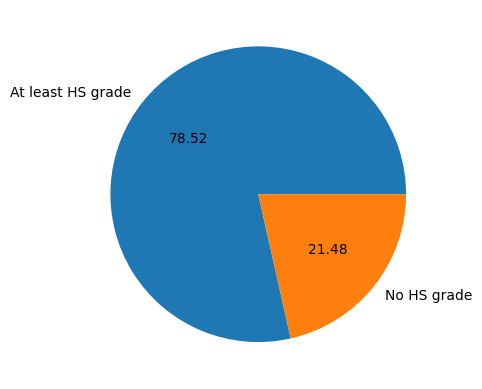

In [60]:
plt.figure()
plt.pie(kid_df['mom_hs'].value_counts(),labels=['At least HS grade', 'No HS grade'],autopct='%.2f');

In [61]:
kid_df['mom_work'] = kid_df[['mom_work']].astype('category')
kid_df['mom_hs'] = kid_df[['mom_hs']].astype('category')

In [62]:
kid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   kid_score  433 non-null    int64   
 1   mom_hs     433 non-null    category
 2   mom_iq     433 non-null    float64 
 3   mom_work   433 non-null    category
 4   mom_age    433 non-null    int64   
dtypes: category(2), float64(1), int64(2)
memory usage: 14.7 KB


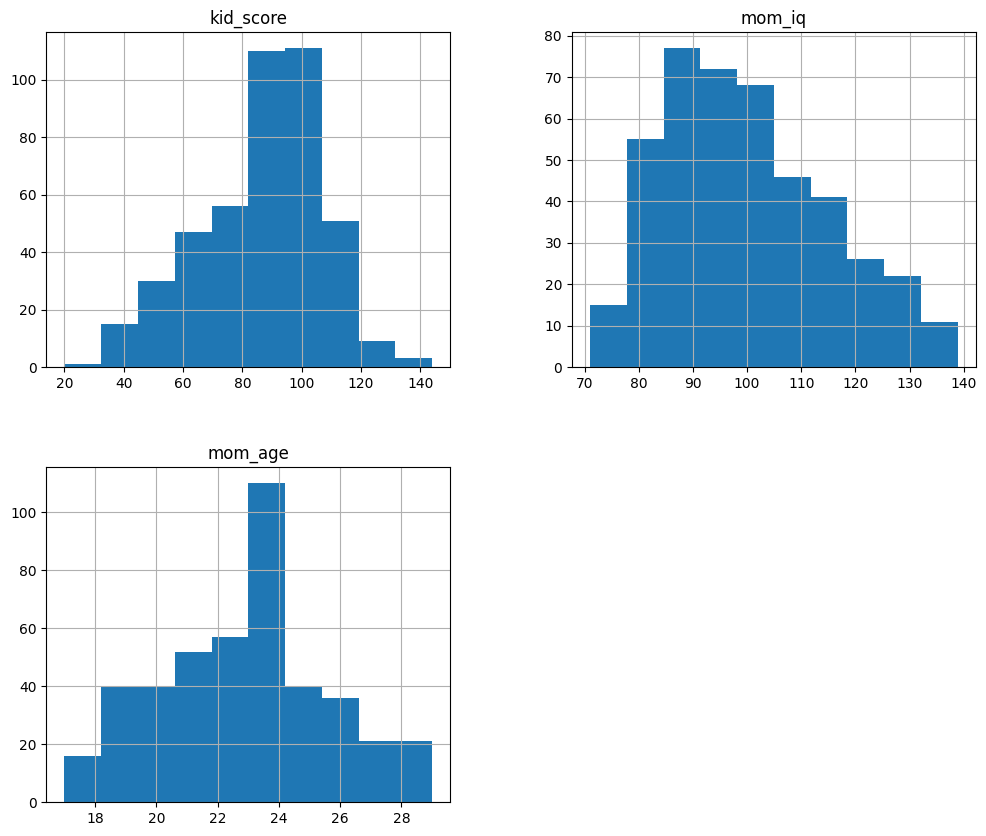

In [63]:
kid_df.hist(figsize=(12,10));

<Figure size 1200x1000 with 0 Axes>

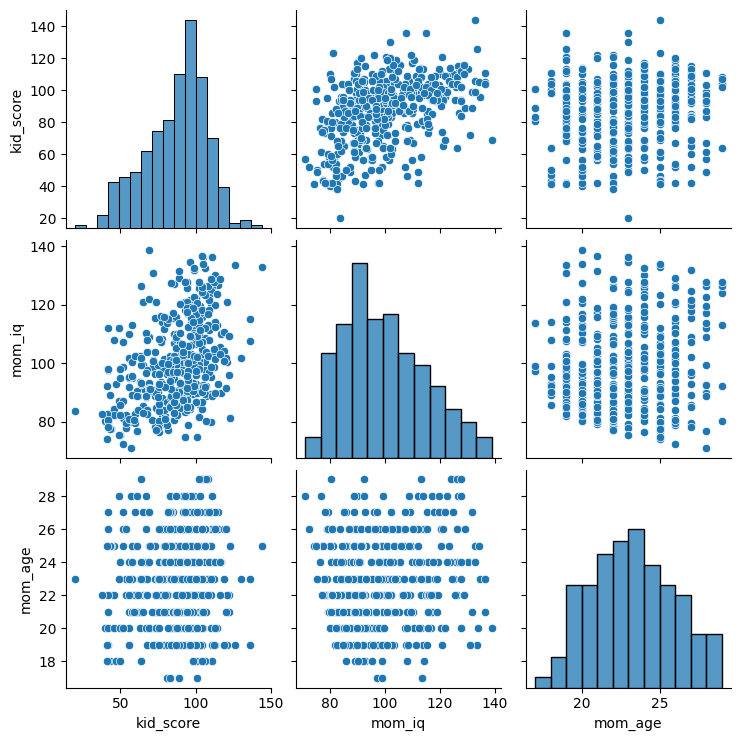

In [64]:
plt.figure(figsize=(12,10))
sns.pairplot(kid_df);

<Axes: >

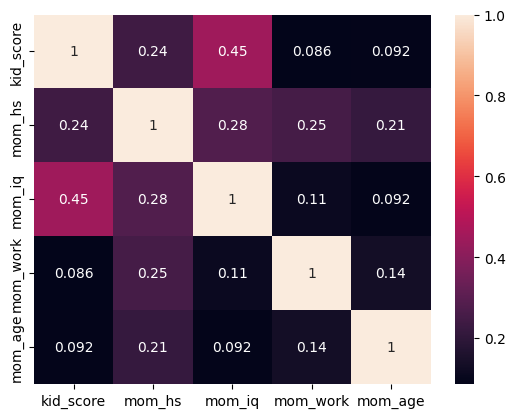

In [65]:
plt.figure()
sns.heatmap(kid_df.corr(),annot=True)

" Pre-Processing "

In [66]:
X = kid_df.drop('kid_score', axis=1)
y = kid_df['kid_score']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=kid_df[['mom_work', 'mom_hs']], random_state=42, shuffle=True
)



In [68]:
X_train['mom_work'].to_numpy().reshape(-1,1)

array([[4],
       [4],
       [2],
       [2],
       [4],
       [1],
       [2],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [1],
       [4],
       [2],
       [1],
       [3],
       [2],
       [4],
       [4],
       [2],
       [4],
       [4],
       [4],
       [1],
       [3],
       [4],
       [4],
       [3],
       [2],
       [2],
       [2],
       [4],
       [2],
       [1],
       [2],
       [4],
       [2],
       [4],
       [4],
       [4],
       [2],
       [4],
       [4],
       [1],
       [4],
       [2],
       [2],
       [3],
       [1],
       [4],
       [1],
       [3],
       [1],
       [2],
       [3],
       [1],
       [2],
       [3],
       [3],
       [2],
       [2],
       [1],
       [3],
       [4],
       [3],
       [4],
       [2],
       [4],
       [4],
       [4],
       [1],
       [4],
       [1],
       [4],
       [3],
       [2],
       [4],
       [2],
       [4],
       [2],
       [3],
    

In [69]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [70]:
from sklearn.preprocessing import OneHotEncoder
one_enc = OneHotEncoder(sparse_output=False)
train_encoded = pd.DataFrame(one_enc.fit_transform(X_train['mom_work'].to_numpy().reshape(-1,1))).add_prefix('mom_work_')


#X_train = pd.concat([X_train, train_encoded], axis=1)
#X_train = X_train.drop('mom_work',axis=1)
#X_train


In [71]:
mom_hs_train = X_train['mom_hs']
X_train = X_train.drop(['mom_work', 'mom_hs'], axis=1)

In [72]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)

In [73]:
X_train = pd.DataFrame(X_train, columns=['mom_iq','mom_age'])

In [74]:
X_train = pd.concat([X_train, mom_hs_train, train_encoded], axis=1)

In [75]:
X_train

,mom_iq,mom_age,mom_hs,mom_work_0,mom_work_1,mom_work_2,mom_work_3
0,-1.481828,0.071411,0,0.0,0.0,0.0,1.0
1,2.127310,-0.655305,1,0.0,0.0,0.0,1.0
2,0.170070,0.434769,1,0.0,1.0,0.0,0.0
3,-1.235463,-0.291947,0,0.0,1.0,0.0,0.0
4,1.231422,0.071411,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
341,-0.176943,-2.108737,0,0.0,0.0,1.0,0.0
342,-1.489831,-0.291947,0,0.0,0.0,1.0,0.0
343,0.460318,-0.291947,1,0.0,0.0,1.0,0.0
344,-0.204389,-0.655305,1,0.0,1.0,0.0,0.0


In [76]:
test_encoded = pd.DataFrame(one_enc.transform(X_test['mom_work'].to_numpy().reshape(-1,1))).add_prefix('mom_work_')

In [77]:
mom_hs_test = X_test['mom_hs']
X_test = X_test.drop(['mom_work', 'mom_hs'], axis=1)

In [78]:
X_test = std_scaler.transform(X_test)

In [79]:
X_test = pd.DataFrame(X_test, columns=['mom_iq' , 'mom_age'])

In [80]:
X_test = pd.concat([X_test,mom_hs_test,test_encoded],axis=1)

In [81]:
X_test

,mom_iq,mom_age,mom_hs,mom_work_0,mom_work_1,mom_work_2,mom_work_3
0,0.890777,0.434769,1,0.0,0.0,0.0,1.0
1,-1.108280,-0.291947,1,0.0,0.0,1.0,0.0
2,2.035429,0.434769,1,0.0,0.0,1.0,0.0
3,-0.833052,-1.382021,1,0.0,0.0,0.0,1.0
4,-0.755518,-0.655305,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
82,1.944126,-0.291947,1,0.0,1.0,0.0,0.0
83,-0.479165,-1.745379,0,0.0,0.0,0.0,1.0
84,-0.917841,-1.382021,0,0.0,1.0,0.0,0.0
85,0.256348,0.071411,1,0.0,0.0,0.0,1.0


" Modeling "

DT

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)
params = {'max_depth' : [2, 4, 6, 10, 15, 20],
          'min_samples_split' : [2,5,7,10,15,20,30],
          'min_samples_leaf': [2,4,7,9,12,15]}
grid = GridSearchCV(estimator=dt, param_grid=params,
                    scoring= 'neg_mean_squared_error' , cv=5)

grid.fit(X_train, y_train)          

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 15, 20],
                         'min_samples_leaf': [2, 4, 7, 9, 12, 15],
                         'min_samples_split': [2, 5, 7, 10, 15, 20, 30]},
             scoring='neg_mean_squared_error')

In [83]:
grid.best_score_

-362.73373320745884

In [84]:
best_dt_mdl = grid.best_estimator_

In [85]:
yhat_train = best_dt_mdl.predict(X_train)

In [86]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, yhat_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, yhat_train)
print(f'{mse_train = } , {rmse_train = } , {r2_train = }')

mse_train = 254.48332785668939 , rmse_train = 15.952533587386343 , r2_train = 0.39382005916741447


RF

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)
params = {'n_estimators' : [5, 10, 20],
          'max_depth' : [2, 6, 10, 20],
          'min_samples_split' : [2,  10, 15, 20],
          'min_samples_leaf' : [4,  9, 12, 15]
    
}
grid = GridSearchCV(estimator=rf, param_grid=params,
                    scoring='neg_mean_squared_error' , cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 6, 10, 20],
                         'min_samples_leaf': [4, 9, 12, 15],
                         'min_samples_split': [2, 10, 15, 20],
                         'n_estimators': [5, 10, 20]},
             scoring='neg_mean_squared_error')

In [88]:
grid.best_score_

-336.631987899845

In [89]:
best_rf_mdl = grid.best_estimator_

In [90]:
yhat_train = best_rf_mdl.predict(X_train)

In [91]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, yhat_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, yhat_train)
print(f'{mse_train = } , {rmse_train = } , {r2_train = }')

mse_train = 319.19672729588996 , rmse_train = 17.866077557647902 , r2_train = 0.23967257542647147


Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [93]:
lr.coef_

array([ 7.87672276,  0.50457991,  6.29801859, -1.78979882, -0.75356807,
        4.15976196, -1.61639507])

In [94]:
lr.intercept_

83.06567208203698

In [95]:
yhat_train = lr.predict(X_train)

In [96]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, yhat_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, yhat_train)
print(f'{mse_train = } , {rmse_train = } , {r2_train = }')

mse_train = 330.02161895171935 , rmse_train = 18.166497156901748 , r2_train = 0.21388765568844814
